In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.cluster import KMeans
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn import tree
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline 

Provided Breast Cancer Wisconson Diagnostic

In [2]:
data = pd.read_csv("./Data.csv")

In [3]:
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


Missing Values Inspected

In [4]:
df = pd.DataFrame(data)
df.isnull()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
565,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
566,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
567,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Drop Missing Rows With Values

In [5]:
my_df = df.dropna()
df.dropna()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,926125,M,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,...,24.290,29.41,179.10,1819.0,0.14070,0.41860,0.6599,0.2542,0.2929,0.09873
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


Descriptive Statistics of Dataset

In [6]:
my_df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.430000e+02,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,...,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000
mean,3.141567e+07,14.112807,19.247035,105.570902,1680.676611,0.096184,0.104069,64.544922,0.048626,0.733441,...,16.237083,25.615009,107.062284,877.982689,0.132231,0.253471,0.270179,0.114175,0.289721,0.083870
std,1.277974e+08,3.555067,4.305809,319.584206,23792.122273,0.014046,0.053258,1501.989974,0.039184,12.872071,...,4.861701,6.137445,33.854376,573.105135,0.022871,0.157480,0.209124,0.066144,0.061888,0.017947
min,8.670000e+03,6.981000,9.710000,43.790000,0.800000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.714210e+05,11.665000,16.160000,74.795000,416.700000,0.085925,0.064120,0.029035,0.020125,0.162000,...,12.980000,21.045000,83.795000,512.800000,0.116400,0.145850,0.113450,0.064530,0.250100,0.071645
50%,9.071450e+05,13.280000,18.800000,85.980000,545.200000,0.095660,0.091820,0.059400,0.032790,0.179300,...,14.900000,25.230000,97.170000,677.300000,0.131300,0.215600,0.224700,0.098580,0.281900,0.080040
75%,8.910502e+06,15.900000,21.680000,104.900000,798.300000,0.105350,0.130350,0.126950,0.072020,0.195650,...,18.800000,29.485000,126.100000,1086.000000,0.145800,0.333800,0.380250,0.161300,0.317750,0.092045
max,9.113205e+08,28.110000,39.280000,7517.000000,555000.100000,0.163400,0.345400,35000.000000,0.201200,300.130000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Histogram related to Adjusted Dataset

array([[<Axes: title={'center': 'radius_mean'}>]], dtype=object)

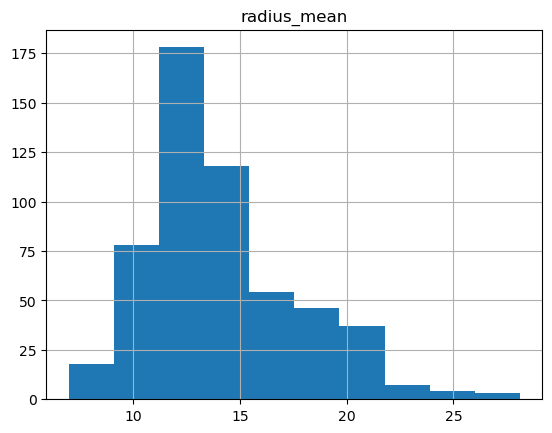

In [7]:
my_df.hist("radius_mean")

Set up x and y values

In [8]:
X = my_df.drop(columns=['radius_mean'])  
y = my_df['diagnosis']
y

0      M
1      M
2      M
3      M
4      M
      ..
563    M
564    M
566    M
567    M
568    B
Name: diagnosis, Length: 543, dtype: object

In [9]:
label_encoder = LabelEncoder()
my_df['diagnosis'] = label_encoder.fit_transform(my_df['diagnosis'])
df

/var/folders/fy/7fjx08gn179fc4xbfj8hr2m80000gn/T/ipykernel_19948/2330247112.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_df['diagnosis'] = label_encoder.fit_transform(my_df['diagnosis'])


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [10]:
X = my_df.drop(columns=['radius_mean'])  
y = my_df['diagnosis']
y

0      1
1      1
2      1
3      1
4      1
      ..
563    1
564    1
566    1
567    1
568    0
Name: diagnosis, Length: 543, dtype: int64

Correatin Matrix and Heat Map

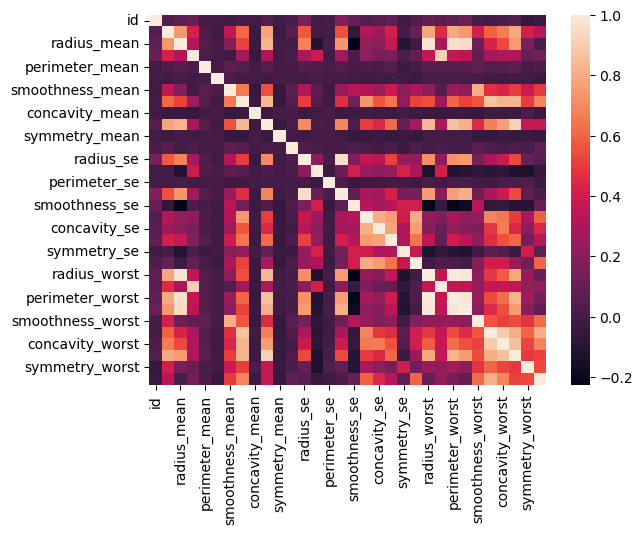

In [11]:
my_df.corr()
dataplot = sb.heatmap(my_df.corr())
plt.show()

In [12]:
params  = {'n_estimators': [50,100,200], 'max_depth':[2,5,8], 'max_features':[5,10,15]}
RF = RandomForestClassifier()
RF = GridSearchCV(RF, params, cv = 10)

ROC

In [13]:
X = my_df.drop(columns=['radius_mean'])  
y = my_df['diagnosis']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [15]:
clf_tree = DecisionTreeClassifier();
clf_reg = LogisticRegression();

In [16]:
clf_tree.fit(X_train, y_train); 
clf_reg.fit(X_train, y_train);

In [17]:
y_score1 = clf_tree.predict_proba(X_test)[:,1]
y_score2 = clf_reg.predict_proba(X_test)[:,1]

In [18]:
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, y_score2)

In [19]:
print('roc_auc_score for DecisionTree: ', roc_auc_score(y_test, y_score1))
print('roc_auc_score for Logistic Regression: ', roc_auc_score(y_test, y_score2))

roc_auc_score for DecisionTree:  1.0
roc_auc_score for Logistic Regression:  0.5274621212121212


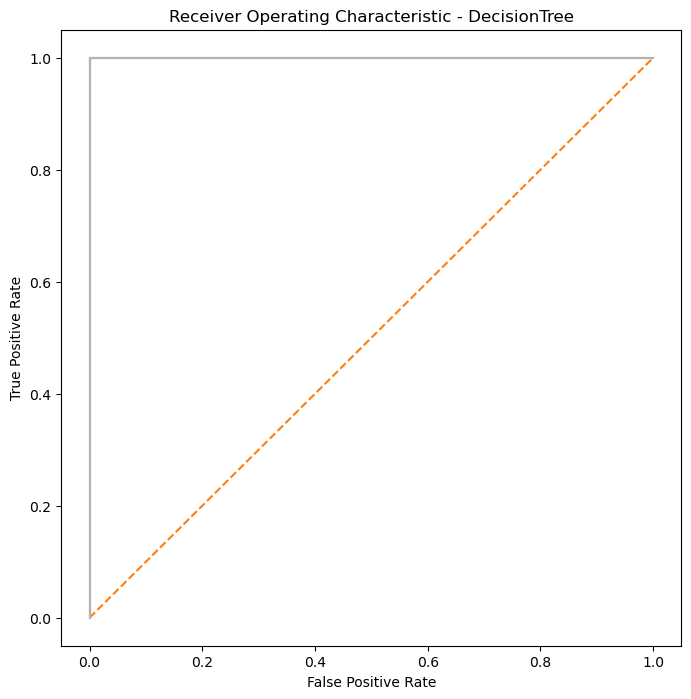

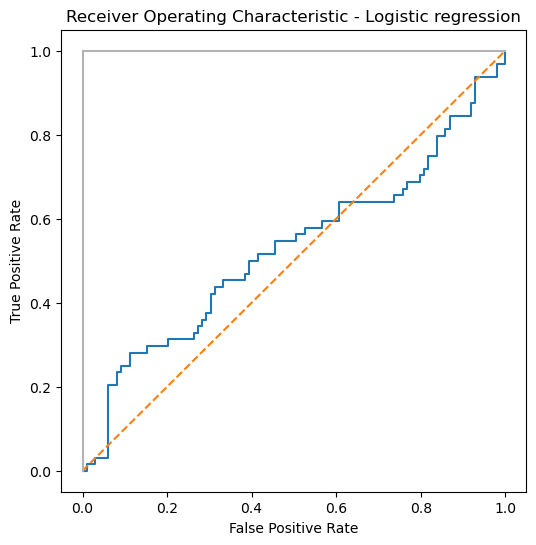

In [20]:
plt.subplots(1, figsize=(8,8))
plt.title('Receiver Operating Characteristic - DecisionTree')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

plt.subplots(1, figsize=(6,6))
plt.title('Receiver Operating Characteristic - Logistic regression')
plt.plot(false_positive_rate2, true_positive_rate2)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Another example of Logistic Regresssion

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0) 

log_regression = LogisticRegression()

log_regression.fit(X_train,y_train)

LogisticRegression()

In [22]:
y_pred_proba = log_regression.predict_proba(X_test)[::,1]

auc = metrics.roc_auc_score(y_test, y_pred_proba)

auc

0.20368634801624497

In [23]:
X_mailing_train, X_mailing_test, y_mailing_train, y_mailing_test = train_test_split(X, y, test_size=.25, random_state=1)

model_mailing = LogisticRegression()
model_mailing.fit(X_mailing_train, y_mailing_train)
pred = model_mailing.predict(X_mailing_test)
accuracy = metrics.accuracy_score(pred, y_mailing_test)
print("The accuracy is: ", accuracy)

The accuracy is:  0.6323529411764706


In [24]:
probabilities = model_mailing.predict_proba(X_mailing_test)[:, 1]

In [25]:
prediction = probabilities > 0.75

confusion_matrix_large = pd.DataFrame(metrics.confusion_matrix(y_mailing_test, prediction,
                                                               labels=[1, 0]), index=['1_true', '0_true'], columns=['1_pred', '0_pred'])
print (confusion_matrix_large)

        1_pred  0_pred
1_true       0      50
0_true       0      86


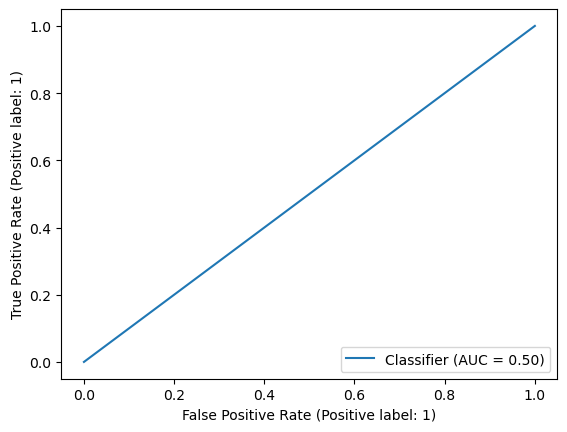

In [26]:
metrics.RocCurveDisplay.from_predictions(y_pred = prediction, y_true=y_mailing_test)
plt.show()

In [27]:
prediction = probabilities > 0.10

confusion_matrix_small = pd.DataFrame(metrics.confusion_matrix(y_mailing_test, prediction, labels=[1, 0]),
                                index=['1_true', '0_true'], columns=['1_pred', '0_pred'])
print (confusion_matrix_small)

        1_pred  0_pred
1_true      50       0
0_true      86       0


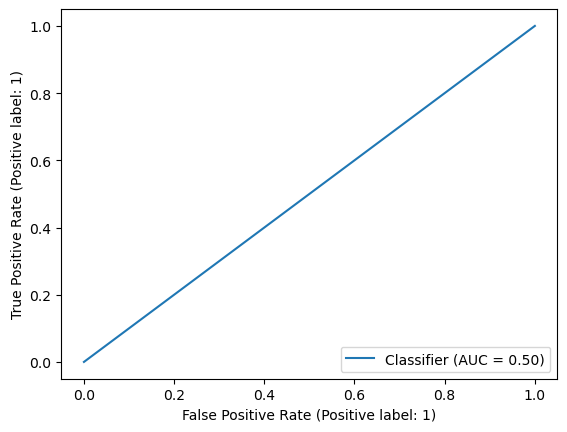

In [28]:
metrics.RocCurveDisplay.from_predictions(y_pred = prediction, y_true=y_mailing_test)
plt.show()

Trees

In [29]:
X = my_df.drop(columns=['radius_mean'])  
y = my_df['diagnosis']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.50)

classifier = tree.DecisionTreeClassifier(max_features = 22)

classifier.fit(X_train, y_train)

pred = classifier.predict(X_test)

accuracy = metrics.accuracy_score(y_test, pred)

accuracy

1.0

In [31]:
accuracy_depth = {}

for depth in [50,100,150,200]:
    
    classifier = tree.DecisionTreeClassifier(max_depth = depth)

    classifier.fit(X_train, y_train)

    pred = classifier.predict(X_test)

    accuracy = metrics.accuracy_score(y_test, pred)

    accuracy_depth[depth] = accuracy
    
accuracy_depth

{50: 1.0, 100: 1.0, 150: 1.0, 200: 1.0}

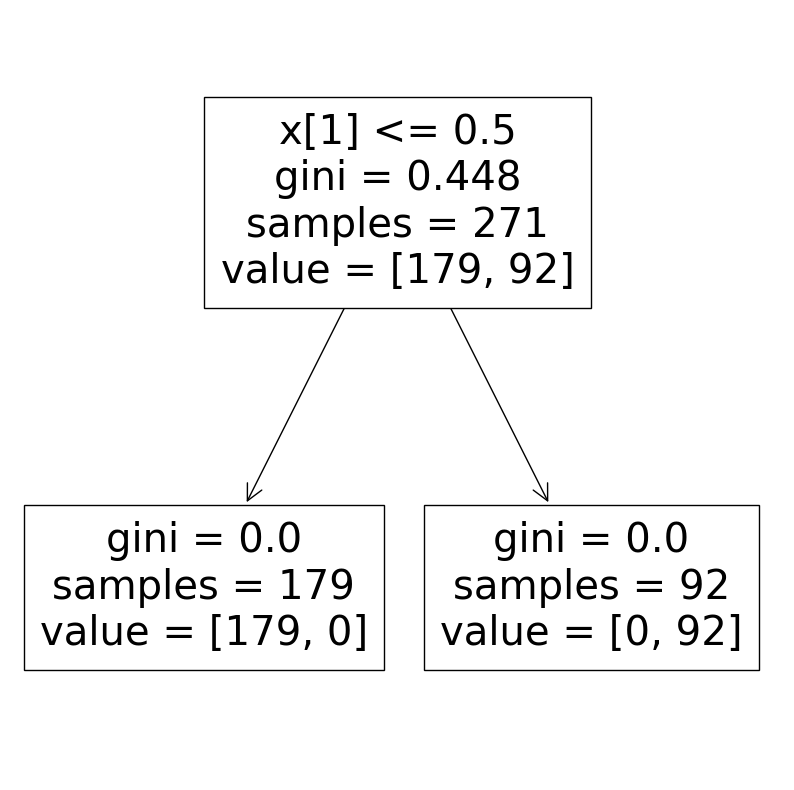

In [32]:
fig, ax = plt.subplots(figsize  = (10,10))
tree.plot_tree(tree.DecisionTreeClassifier().fit(X_train, y_train), ax= ax)
plt.show()

In [33]:
X = my_df.drop(columns=['perimeter_mean'])  
y = my_df['diagnosis']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.50)

classifier = tree.DecisionTreeClassifier(max_features = 25)

classifier.fit(X_train, y_train)

pred = classifier.predict(X_test)

accuracy = metrics.accuracy_score(y_test, pred)

accuracy

1.0

In [35]:
accuracy_depth = {}

for depth in [50,100,150,200]:
    
    classifier = tree.DecisionTreeClassifier(max_depth = depth)

    classifier.fit(X_train, y_train)

    pred = classifier.predict(X_test)

    accuracy = metrics.accuracy_score(y_test, pred)

    accuracy_depth[depth] = accuracy
    
accuracy_depth

{50: 1.0, 100: 1.0, 150: 1.0, 200: 1.0}

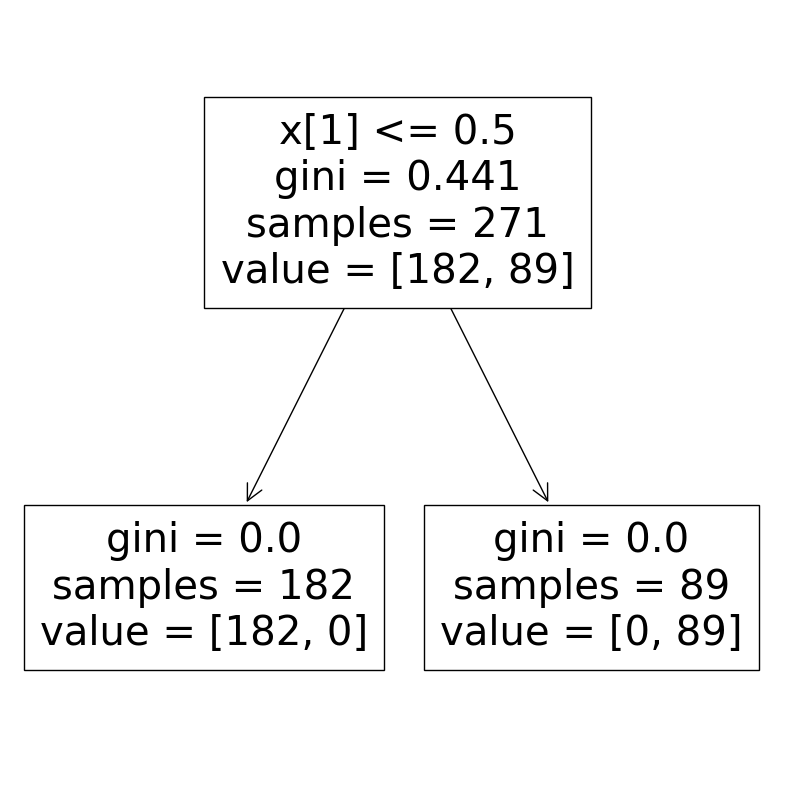

In [36]:
fig, ax = plt.subplots(figsize  = (10,10))
tree.plot_tree(tree.DecisionTreeClassifier().fit(X_train, y_train), ax= ax)
plt.show()

Random Forest

In [31]:
X = my_df.drop(columns=['radius_mean'])  
y = my_df['diagnosis']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = .45)
clf = RandomForestClassifier(n_estimators= 345)
clf = clf.fit(X_train, y_train)
pred = clf.predict(X_test)
acc_rf = metrics.accuracy_score(y_test, pred)
acc_rf

0.9866220735785953

In [33]:
clf = AdaBoostClassifier(n_estimators= 300)
clf = clf.fit(X_train, y_train)
pred = clf.predict(X_test)
acc_Ada = metrics.accuracy_score(y_test, pred)
acc_Ada

1.0

In [34]:
params  = {'n_estimators': [50,100,200], 'max_depth':[2,5,8], 'max_features':[5,10,15]}
RF = RandomForestClassifier()
RF = GridSearchCV(RF, params, cv = 10)
RF = RF.fit(X_train, y_train)

In [35]:
RF.cv_results_
RF.best_score_
RF.best_params_

{'max_depth': 2, 'max_features': 10, 'n_estimators': 100}

Support Vector Machines

In [36]:
X = my_df.drop(columns=['radius_mean'])  
y = my_df['diagnosis']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

clf = svm.SVC(kernel = "rbf", C = 0.9)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, pred)
accuracy

0.5950920245398773

In [38]:
clf.n_support_

array([136, 132], dtype=int32)

In [39]:
clf.support_vectors_

array([[8.9713200e+05, 0.0000000e+00, 1.9860000e+01, ..., 2.0220000e-02,
        3.2920000e-01, 6.5220000e-02],
       [8.9864002e+07, 0.0000000e+00, 1.5450000e+01, ..., 7.8640000e-02,
        2.7650000e-01, 7.8060000e-02],
       [8.8147101e+07, 0.0000000e+00, 1.5460000e+01, ..., 4.4640000e-02,
        2.6150000e-01, 8.2690000e-02],
       ...,
       [8.7983000e+05, 1.0000000e+00, 2.0260000e+01, ..., 1.0960000e-01,
        3.2750000e-01, 6.4690000e-02],
       [8.6882600e+05, 1.0000000e+00, 1.7570000e+01, ..., 1.6670000e-01,
        3.4140000e-01, 7.1470000e-02],
       [8.8607020e+06, 1.0000000e+00, 1.7080000e+01, ..., 1.8570000e-01,
        3.1380000e-01, 8.1130000e-02]])

In [40]:
confusion = metrics.confusion_matrix(y_test, pred)
confusion_df = pd.DataFrame(confusion, index = ("true_0", "true_1"), columns = ("pred_0", "pred_1"))
confusion_df

,pred_0,pred_1
true_0,97,0
true_1,66,0


In [41]:
cv = StratifiedKFold(n_splits=3, random_state=1600, shuffle=True)
for i, (train_idx, test_idx) in enumerate (cv.split(X,y)):
    X_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
    X_test, y_test = X.iloc[test_idx], y.iloc[test_idx]

    model = svm.SVC()
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    print(f'fold number: {i+1}')
    print('train_accuracy :\n', metrics.classification_report(y_true=y_train, y_pred=y_pred_train, digits = 3))
    print('test_accuracy :\n', metrics.classification_report(y_true=y_test, y_pred=y_pred_test, digits = 3))

fold number: 1
train_accuracy :
               precision    recall  f1-score   support

           0      0.635     1.000     0.777       230
           1      0.000     0.000     0.000       132

    accuracy                          0.635       362
   macro avg      0.318     0.500     0.389       362
weighted avg      0.404     0.635     0.494       362

test_accuracy :
               precision    recall  f1-score   support

           0      0.635     1.000     0.777       115
           1      0.000     0.000     0.000        66

    accuracy                          0.635       181
   macro avg      0.318     0.500     0.389       181
weighted avg      0.404     0.635     0.494       181

fold number: 2
train_accuracy :
               precision    recall  f1-score   support

           0      0.635     1.000     0.777       230
           1      0.000     0.000     0.000       132

    accuracy                          0.635       362
   macro avg      0.318     0.500     0.389  

/Users/sahimahmed/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sahimahmed/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sahimahmed/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sahima

End of Project